# Upload des fichiers

In [ ]:
# from google.colab import files


# uploaded = files.upload()

In [ ]:
# print(uploaded)

Si l'upload c'est bien passé vous devriez voir votre fichier s'afficher dans la case des fichiers   
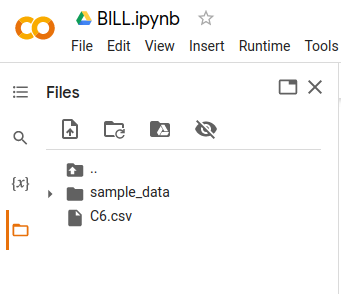

# Chargement des lib et csv

In [ ]:
# Chargement des libraries
import os
import io
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame
from typing import IO, Any

In [ ]:
# Lecture de nos fichiers CSV
files = [
    "https://raw.githubusercontent.com/JulienRaynal/BILL/main/C6.csv",
    "https://raw.githubusercontent.com/JulienRaynal/BILL/main/C10.csv",
    "https://raw.githubusercontent.com/JulienRaynal/BILL/main/P1.csv"
]
dictDF = {}

def csv_reader(files: list, dictDF: dict = None):
  for file in files:
    datas: Any = pd.read_csv(file, sep="\t",
                                  names=["ID", "REF", "ALT", "SVTYPE", "SVLEN", "END", "AF", "PASSAGE", "CULTURE", "DR", "DV"])
    # Ajout des numéros de passages et de colonies
    datas[["PASSAGE", "CULTURE"]] = datas[["PASSAGE", "CULTURE"]].fillna(method='ffill')
    # Dans le cas où le passage ne possède pas de colonies (P1) nous remplissons d'une valeur pour éviter le NaN (P50)
    datas["CULTURE"] = datas["CULTURE"].fillna(value="P50")
    # Suppression des lignes qui n'ont pas de données
    datas = datas.dropna(axis=0, subset=["ID"])
    # Suppression des prefix inutiles
    datas["SVTYPE"] = datas["SVTYPE"].map(lambda x: x.lstrip("SVTYPE="))
    datas["SVLEN"] = datas["SVLEN"].map(lambda x: x.lstrip("SVLEN=").lstrip("-"))
    datas["SVLEN"] = pd.to_numeric(datas['SVLEN'], errors='coerce')
    datas["END"] = datas["END"].map(lambda x: x.lstrip("END="))
    datas["AF"] = datas["AF"].map(lambda x: x.lstrip("AF="))

    # Normalisation des données
    # cols_to_norm = ['SVLEN']
    # datas[cols_to_norm] = datas[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
    if dictDF is not None:
      culture_name: str = file.rstrip(".csv").split("main/", 1)[1]
      dictDF[culture_name] = datas
    else:
      return datas

csv_reader(files, dictDF)

# Données brut

## Affichage de toutes les mutations par culture et par passage

P20    36
P30    36
P50     9
P10     4
Name: PASSAGE, dtype: int64

,ID,REF,ALT,SVTYPE,SVLEN,END,AF,PASSAGE,CULTURE,DR,DV
0,29448.0,N,<DEL>,DEL,25,29473,0.909,P10,C6,1.0,10.0
1,31249.0,N,<DEL>,DEL,27,31276,1.000,P10,C6,0.0,10.0
2,47119.0,N,<DEL>,DEL,18,47137,0.923,P10,C6,1.0,12.0
3,49312.0,N,<DEL>,DEL,76,49388,0.917,P10,C6,1.0,11.0
4,16050.0,N,TGTGTGTGTG,INS,10,16050,0.307,P20,C6,61.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...
81,143580.0,N,CTGCCCTCTCAACCGGTAACCTCTGTACCTCTCAACCGGTAACCTC...,INS,70,143580,1.000,P50,C6,0.0,3194.0
82,144253.0,N,CACCCACCATCTCCCCTTCCCGGTGGCCACCCTGGCCGCGGCCACG...,INS,11303,144253,0.490,P50,C6,1500.0,1440.0
83,288888.0,N,TGTGTGTGTGTGTGTGTG,INS,16,288888,0.444,P50,C6,298.0,238.0
84,288888.0,N,TGAGTGTGTGTGTGTGTGTGTGTGTG,INS,22,288888,0.237,P50,C6,409.0,127.0


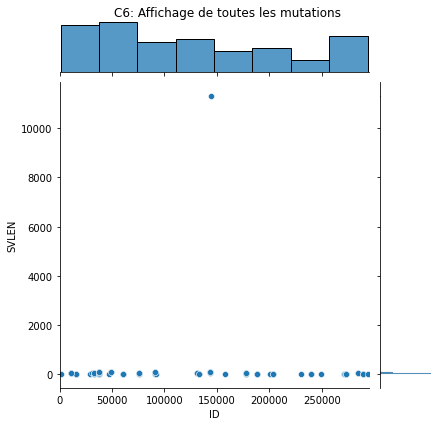

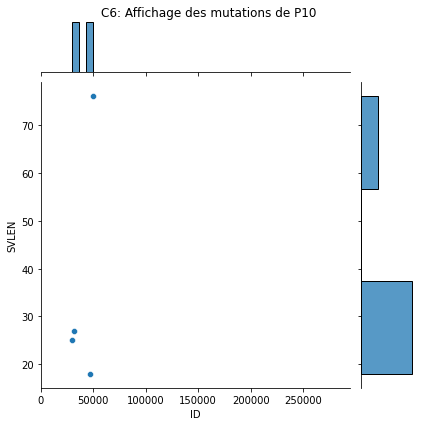

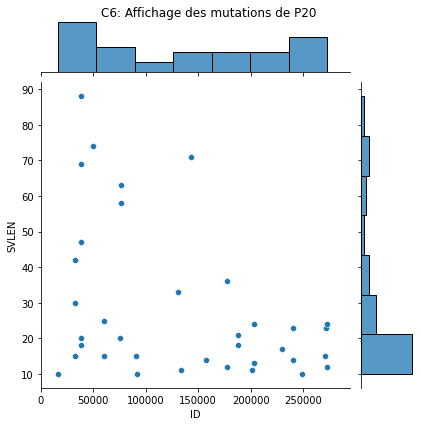

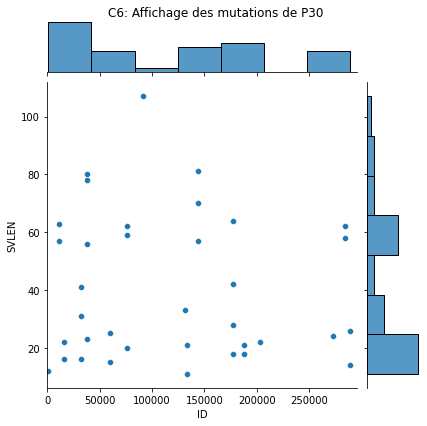

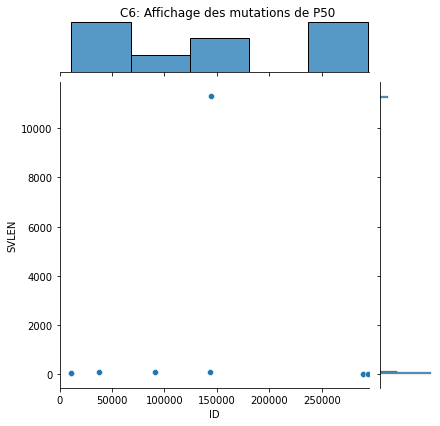

P30    66
P10    58
P40    55
P50    46
P20    27
Name: PASSAGE, dtype: int64

,ID,REF,ALT,SVTYPE,SVLEN,END,AF,PASSAGE,CULTURE,DR,DV
0,14371,N,<DEL>,DEL,25,14396,1.000,P10,C10,0,17
1,16050,N,TGAGTGTGTGTGTGTGTG,INS,18,16050,0.308,P10,C10,27,12
2,16050,N,TGAGTGTGTGTGTGTGTGTGTG,INS,24,16050,0.359,P10,C10,25,14
3,20751,N,CACGACCACG,INS,10,20751,0.102,P10,C10,202,23
4,22309,N,<DEL>,DEL,12,22321,1.000,P10,C10,0,429
...,...,...,...,...,...,...,...,...,...,...,...
247,284382,N,AGTGAGAGCA,INS,10,284382,0.144,P50,C10,255,43
248,287209,N,<DEL>,DEL,25,287234,0.768,P50,C10,47,156
249,288888,N,TGAGTGTGTGTGTG,INS,14,288888,0.399,P50,C10,89,59
250,288888,N,TGAGTGTGTGTGTGTGTGTGTGTGTGTG,INS,20,288888,0.203,P50,C10,118,30


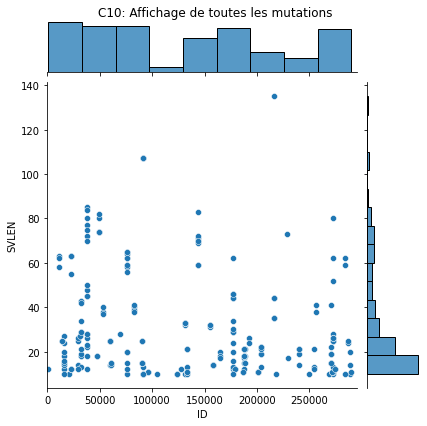

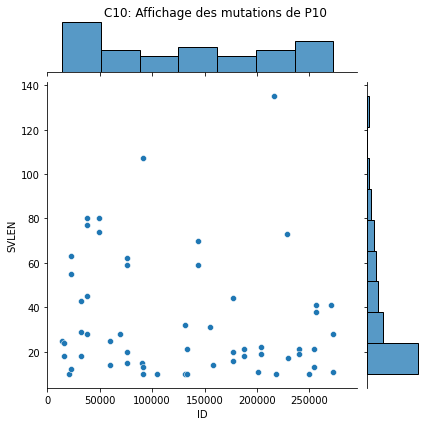

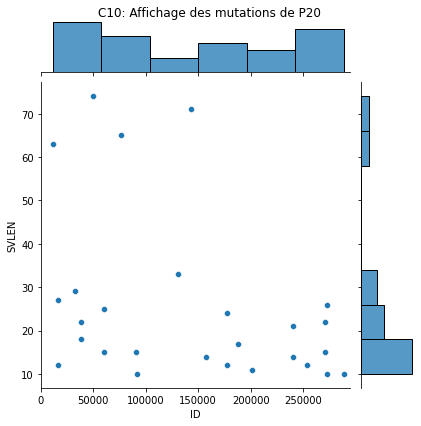

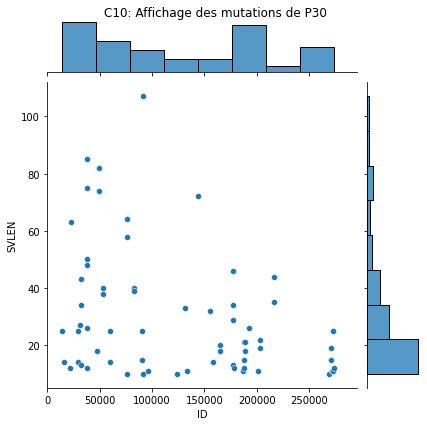

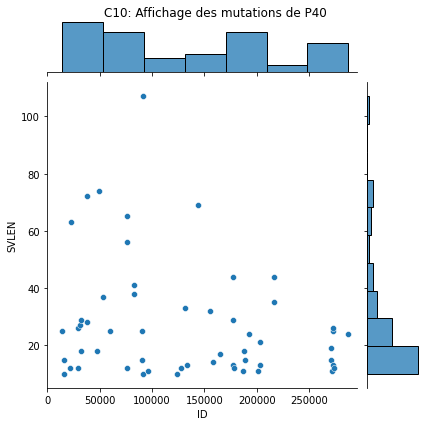

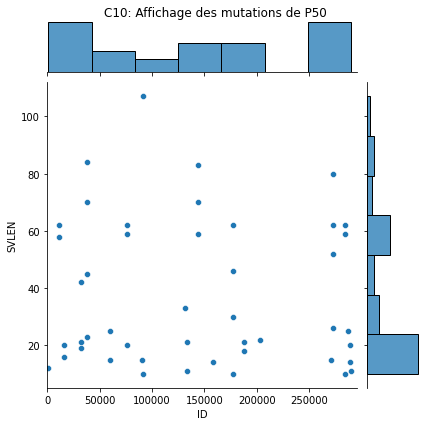

P1_    49
Name: PASSAGE, dtype: int64

,ID,REF,ALT,SVTYPE,SVLEN,END,AF,PASSAGE,CULTURE,DR,DV
0,1137,N,<DEL>,DEL,12,1149,1.000,P1_,P50,0,29
1,11325,N,GTACATCAATTGTTTGACACATCAACTGTAAGTACATCAATTGTTT...,INS,58,11325,0.406,P1_,P50,60,41
2,11334,N,TCAACGGTTTGACACATCAACTGTAAGTACATCAATTGTTTGACAC...,INS,61,11334,0.653,P1_,P50,35,66
3,14371,N,<DEL>,DEL,25,14396,0.860,P1_,P50,22,135
4,14377,N,<DEL>,DEL,15,14392,0.127,P1_,P50,137,20
5,16050,N,TGAGTGTGTGTGTGTGTG,INS,18,16050,0.422,P1_,P50,130,95
6,16050,N,TGAGTGTGTGTGTGTGTGTG,INS,20,16050,0.262,P1_,P50,166,59
7,16050,N,TGAGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTG...,INS,46,16050,0.058,P1_,P50,212,13
8,16069,N,<DEL>,DEL,24,16093,0.076,P1_,P50,207,17
9,32535,N,AAAAAAAAAAAAAAAAAA,INS,19,32535,0.211,P1_,P50,1002,268


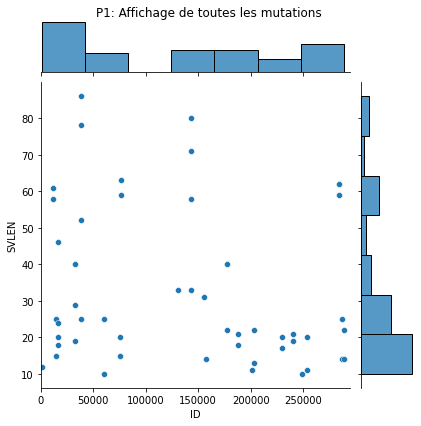

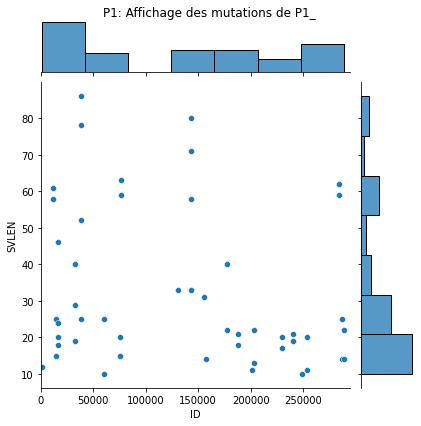

In [ ]:
# Affichage graphique brut de toutes les mutations dans les CSV par culture et par passage
for key, value in dictDF.items():
    display(value["PASSAGE"].value_counts())
    display(value)
    p = sns.jointplot(x=value["ID"], y=value["SVLEN"], kind="scatter")
    p.ax_marg_x.set_xlim(0, 295052)
    p.fig.suptitle(key + ": Affichage de toutes les mutations")
    p.fig.subplots_adjust(top=0.95)
    plt.show()

    for passage in value["PASSAGE"].unique():
        passage_data = value.loc[value["PASSAGE"] == passage]
        p = sns.jointplot(x=passage_data["ID"], y=passage_data["SVLEN"], kind="scatter")
        p.ax_marg_x.set_xlim(0, 295052)
        p.fig.suptitle(key + ": Affichage des mutations de " + passage)
        p.fig.subplots_adjust(top=0.95)
        plt.show()

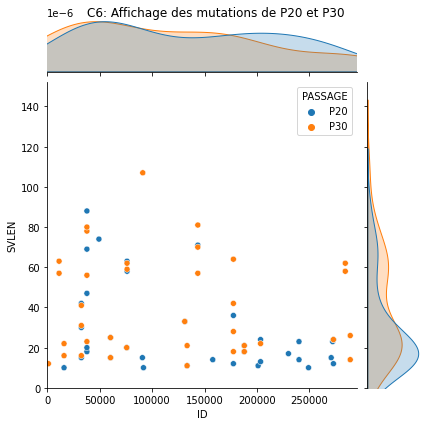

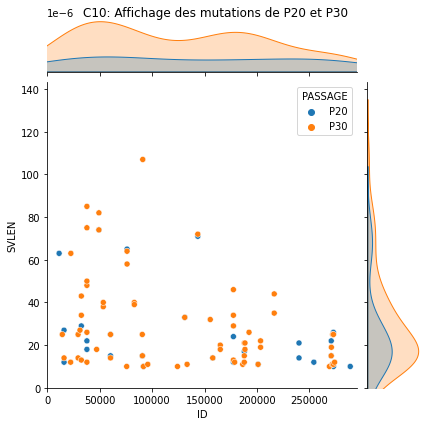

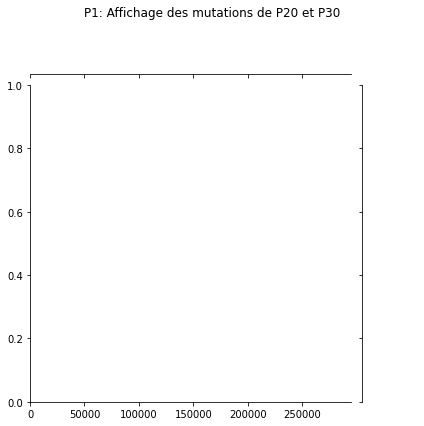

In [ ]:
# Jointplot P20 et P30 pour une même sous culture

# Pour chaque fichier csv on affiche un jointplot
for key, value in dictDF.items():
  mutation_data = value[value["PASSAGE"].isin(["P20", "P30"])]

  p = sns.jointplot(data=mutation_data, x="ID", y="SVLEN", hue="PASSAGE")
  p.ax_marg_x.set_xlim(0, 295052)
  p.ax_marg_y.set_ylim(0, None)
  p.fig.suptitle(key + ": Affichage des mutations de P20 et P30")
  p.fig.subplots_adjust(top=0.95)
  plt.show()

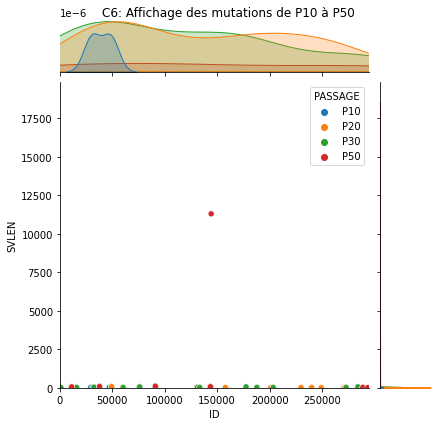

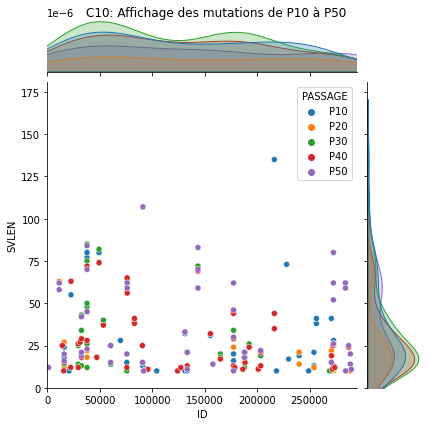

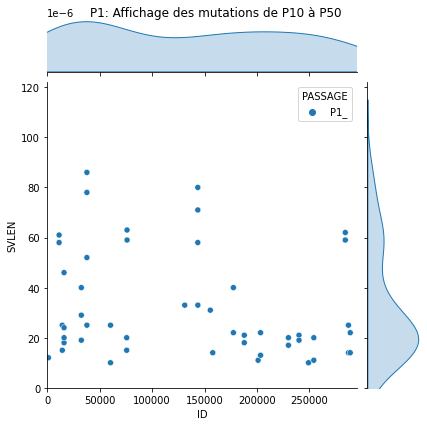

In [ ]:
# Jointplot tous les  pour une même sous culture

# Pour chaque fichier csv on affiche un jointplot
for key, value in dictDF.items():
  mutation_data = value

  p = sns.jointplot(data=mutation_data, x="ID", y="SVLEN", hue="PASSAGE")
  p.ax_marg_x.set_xlim(0, 295052)
  p.ax_marg_y.set_ylim(0, None)
  p.fig.suptitle(key + ": Affichage des mutations de P10 à P50")
  p.fig.subplots_adjust(top=0.95)
  plt.show()

In [ ]:
# Affichage avec un ridgeline de la position des mutations

# Mise en place de la palette de couleurs
pal = sns.color_palette(palette='coolwarm', n_colors=12)

# Fusion des cultures en fonction du choc thermique subit
hotDF = pd.concat([dictDF["C6"], dictDF["C10"]])
hotDF

,ID,REF,ALT,SVTYPE,SVLEN,END,AF,PASSAGE,CULTURE,DR,DV
0,29448.0,N,<DEL>,DEL,25,29473,0.909,P10,C6,1.0,10.0
1,31249.0,N,<DEL>,DEL,27,31276,1.000,P10,C6,0.0,10.0
2,47119.0,N,<DEL>,DEL,18,47137,0.923,P10,C6,1.0,12.0
3,49312.0,N,<DEL>,DEL,76,49388,0.917,P10,C6,1.0,11.0
4,16050.0,N,TGTGTGTGTG,INS,10,16050,0.307,P20,C6,61.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...
247,284382.0,N,AGTGAGAGCA,INS,10,284382,0.144,P50,C10,255.0,43.0
248,287209.0,N,<DEL>,DEL,25,287234,0.768,P50,C10,47.0,156.0
249,288888.0,N,TGAGTGTGTGTGTG,INS,14,288888,0.399,P50,C10,89.0,59.0
250,288888.0,N,TGAGTGTGTGTGTGTGTGTGTGTGTGTG,INS,20,288888,0.203,P50,C10,118.0,30.0


## Affichage des mutations particulières

In [ ]:
# APPARITION MUTATION P20 -> P30 (Non trié et nettoyé)
for key, value in dictDF.items():
  df = value
  # On récupère toutes les mutations 
  df = df.loc[df['PASSAGE'].isin(["P20","P30"])]

  # On supprime toutes les mutations à la même position
  df = df.drop_duplicates('ID')
  # On récupère toutes les mutations restantes à P30
  df = df.loc[df["PASSAGE"] == "P30"]
  print("========== DIFF ===============")
  display(df.sort_values(by=["ID", "AF", "DV"]))
  display(df["SVTYPE"].value_counts())

========== DIFF ===============


,ID,REF,ALT,SVTYPE,SVLEN,END,AF,PASSAGE,CULTURE,DR,DV
40,1137.0,N,<DEL>,DEL,12,1149,0.710,P30,C6,9.0,22.0
41,11325.0,N,AAGCAGCATCAATTGTTTGACACAATTGTTTAATACATCAACTGTG...,INS,57,11325,0.151,P30,C6,129.0,23.0
42,11334.0,N,TCAATTGTTTGACACATCAACTGTAAGTACATCAATTGTTTGACAC...,INS,63,11334,0.125,P30,C6,133.0,19.0
53,60349.0,N,GGCAGAACGCGTCTTCAGA,INS,15,60349,0.237,P30,C6,1161.0,361.0
54,75785.0,N,CCGAACGCGTCCTCCGCGCCGTTCATCCGTCCTCA,INS,20,75785,0.086,P30,C6,1381.0,130.0
57,91094.0,N,<DEL>,DEL,107,91201,1.000,P30,C6,0.0,2081.0
59,133353.0,N,CACCTCACACCA,INS,11,133353,0.399,P30,C6,811.0,538.0
63,143596.0,N,<INS>,INS,81,143596,0.011,P30,C6,1396.0,16.0
70,203393.0,N,TCGTCCAAACCTCTCTCAACAC,INS,22,203393,0.507,P30,C6,687.0,707.0
71,272851.0,N,CTAGCCCCCAGCCCTAGCCCTAGCT,INS,24,272851,0.170,P30,C6,1063.0,218.0


INS    10
DEL     2
Name: SVTYPE, dtype: int64

========== DIFF ===============


,ID,REF,ALT,SVTYPE,SVLEN,END,AF,PASSAGE,CULTURE,DR,DV
85,14371,N,<DEL>,DEL,25,14396,0.370,P30,C10,17,10
87,22309,N,<DEL>,DEL,12,22321,0.777,P30,C10,23,80
88,22553,N,<DEL>,DEL,63,22616,0.495,P30,C10,52,51
89,29439,N,<DEL>,DEL,25,29464,0.504,P30,C10,66,67
90,29459,N,<DEL>,DEL,14,29473,0.113,P30,C10,118,15
91,31249,N,<DEL>,DEL,27,31276,0.562,P30,C10,60,77
101,47119,N,<DEL>,DEL,18,47137,0.881,P30,C10,14,104
102,49275,N,<DEL>,DEL,74,49349,0.791,P30,C10,24,91
103,49304,N,<DEL>,DEL,82,49386,0.095,P30,C10,105,11
104,53428,N,<DEL>,DEL,38,53466,0.719,P30,C10,36,92


DEL    34
INS     8
Name: SVTYPE, dtype: int64

========== DIFF ===============


,ID,REF,ALT,SVTYPE,SVLEN,END,AF,PASSAGE,CULTURE,DR,DV


Series([], Name: SVTYPE, dtype: int64)

In [ ]:
#Affichage des mutations apparaissant dans les passages données en argument

for key, df in dictDF.items():
  print("==================" + key + "=====================")
  display(df)

# Nous retourne la liste des premiers passages avec une valeur
def getFirstPassage(ranges, df):
  for i in range(len(ranges)):
    if df[df["PASSAGE"] == ranges[i]].empty:
      continue
    else:
      return ranges[i], df[df["PASSAGE"] == ranges[i]]


def getCommonMutation(ranges: list):
  # Pour chaque fichier contenant nos données on boucle
  for key, df in dictDF.items():
    # On récupère le nom du premier passage avec des variants et les variants
    firstRange, dfMutation = getFirstPassage(ranges, df)
    firstRangeIndex = ranges.index(firstRange)

    print(firstRange + " contient: " + str(len(dfMutation.index)) + " variants")

    # On supprime les passages vides et notre premier passsage de notre liste de passages
    new_ranges = ranges[firstRangeIndex+1:]
    
    # On boucle sur les passages restant pour comparer les variants avec ceux qu'on a déjà enregistré
    for i in range(len(new_ranges)):
      # Si notre passage ne contient pas de variants on le saute
      if df[df["PASSAGE"] == new_ranges[i]].empty:
        print(new_ranges[i] + " ne contient pas de variants")
        continue
      else:
        # On récupère tous les variants du passage d'interet
        keptMutation = df[df["PASSAGE"] == new_ranges[i]]
        # On regarde que ces variants apparaissent bien dans notre dataframe des variants conservé
        keptMutation = keptMutation[keptMutation["ID"].isin(dfMutation["ID"])]
        # On supprime dans notre dataframe de variant conservé tous les variants qui ne sont pas dans notre passage d'interet
        dfMutation = dfMutation[dfMutation["ID"].isin(keptMutation["ID"])]
        # On ajoute les variants du passage d'interet dans notre dataframe
        dfMutation = dfMutation.append(keptMutation)
        
        # On supprime tous les doublons potentiels qui aurait pu apparaitre
        dfMutation = dfMutation[dfMutation.duplicated(['ID'], keep=False)]



        print(new_ranges[i] + " a: " + str(len(keptMutation)) + " variants en commun")

        if len(keptMutation.index) == 0:
          print("Pas de variants en commun avec P10, on arrête le script")
          break
    

    # p10 = df[df["ID"] == "P10"]
    # p20 = df[df["ID"] == "P20"]
    # dfMutation = dfMutation[~dfMutation["ID"].isin(p10)]
    # dfMutation = dfMutation[~dfMutation["ID"].isin(p20)]
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
        display(dfMutation.sort_values(by=["ID", "AF", "PASSAGE"], ascending=[True, False, True]))


# Pour toutes mutations en commun
# ranges = ["P10", "P20", "P30", "P40", "P50"]
# getCommonMutation(ranges)

# # Pour mutation de P20 -> P40 -> P50
# ranges = ["P20", "P40", "P50"]
# getCommonMutation(ranges)

# Si vous voulez choisir vous même les passages à comparer enlevez les # devant les 2 prochaines lignes et changez les PXX dans ranges
#ranges = ["P10", "P20", "P30", "P40", "P50"]
# getCommonMutation(ranges)


# Les mutations apparaissant à P30 P40 et P50 (sachant qu'on ne supprime pas les mutations de P10 et P20) (Non trié et nettoyé)
# ranges = ["P30", "P40", "P50"]
# getCommonMutation(ranges)

==================C6=====================


,ID,REF,ALT,SVTYPE,SVLEN,END,AF,PASSAGE,CULTURE,DR,DV
0,29448.0,N,<DEL>,DEL,25,29473,0.909,P10,C6,1.0,10.0
1,31249.0,N,<DEL>,DEL,27,31276,1.000,P10,C6,0.0,10.0
2,47119.0,N,<DEL>,DEL,18,47137,0.923,P10,C6,1.0,12.0
3,49312.0,N,<DEL>,DEL,76,49388,0.917,P10,C6,1.0,11.0
4,16050.0,N,TGTGTGTGTG,INS,10,16050,0.307,P20,C6,61.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...
81,143580.0,N,CTGCCCTCTCAACCGGTAACCTCTGTACCTCTCAACCGGTAACCTC...,INS,70,143580,1.000,P50,C6,0.0,3194.0
82,144253.0,N,CACCCACCATCTCCCCTTCCCGGTGGCCACCCTGGCCGCGGCCACG...,INS,11303,144253,0.490,P50,C6,1500.0,1440.0
83,288888.0,N,TGTGTGTGTGTGTGTGTG,INS,16,288888,0.444,P50,C6,298.0,238.0
84,288888.0,N,TGAGTGTGTGTGTGTGTGTGTGTGTG,INS,22,288888,0.237,P50,C6,409.0,127.0


==================C10=====================


,ID,REF,ALT,SVTYPE,SVLEN,END,AF,PASSAGE,CULTURE,DR,DV
0,14371,N,<DEL>,DEL,25,14396,1.000,P10,C10,0,17
1,16050,N,TGAGTGTGTGTGTGTGTG,INS,18,16050,0.308,P10,C10,27,12
2,16050,N,TGAGTGTGTGTGTGTGTGTGTG,INS,24,16050,0.359,P10,C10,25,14
3,20751,N,CACGACCACG,INS,10,20751,0.102,P10,C10,202,23
4,22309,N,<DEL>,DEL,12,22321,1.000,P10,C10,0,429
...,...,...,...,...,...,...,...,...,...,...,...
247,284382,N,AGTGAGAGCA,INS,10,284382,0.144,P50,C10,255,43
248,287209,N,<DEL>,DEL,25,287234,0.768,P50,C10,47,156
249,288888,N,TGAGTGTGTGTGTG,INS,14,288888,0.399,P50,C10,89,59
250,288888,N,TGAGTGTGTGTGTGTGTGTGTGTGTGTG,INS,20,288888,0.203,P50,C10,118,30


==================P1=====================


,ID,REF,ALT,SVTYPE,SVLEN,END,AF,PASSAGE,CULTURE,DR,DV
0,1137,N,<DEL>,DEL,12,1149,1.000,P1_,P50,0,29
1,11325,N,GTACATCAATTGTTTGACACATCAACTGTAAGTACATCAATTGTTT...,INS,58,11325,0.406,P1_,P50,60,41
2,11334,N,TCAACGGTTTGACACATCAACTGTAAGTACATCAATTGTTTGACAC...,INS,61,11334,0.653,P1_,P50,35,66
3,14371,N,<DEL>,DEL,25,14396,0.860,P1_,P50,22,135
4,14377,N,<DEL>,DEL,15,14392,0.127,P1_,P50,137,20
5,16050,N,TGAGTGTGTGTGTGTGTG,INS,18,16050,0.422,P1_,P50,130,95
6,16050,N,TGAGTGTGTGTGTGTGTGTG,INS,20,16050,0.262,P1_,P50,166,59
7,16050,N,TGAGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTG...,INS,46,16050,0.058,P1_,P50,212,13
8,16069,N,<DEL>,DEL,24,16093,0.076,P1_,P50,207,17
9,32535,N,AAAAAAAAAAAAAAAAAA,INS,19,32535,0.211,P1_,P50,1002,268


## Affichage de la riggeline

In [ ]:
# # Selection des couleurs
# pal = sns.color_palette(palette='coolwarm', n_colors=12)

# # Récupération des cultures
# for key, value in dictDF.items():
#   # Creation de la facetgrid
#   g = sns.FacetGrid(value, row='PASSAGE', hue='PASSAGE', aspect=15, height=0.75, palette=pal)
#   # Ensuite nous ajoutons le kdeplot de densité pour chaque passage
#   g.map(sns.kdeplot, 'ID',
#         bw_adjust=1, clip_on=False,
#         fill=True, alpha=1, linewidth=1.5)
#   # Ajout d'une ligne blanche qui représente le contour de chaque kdeplot
#   g.map(sns.kdeplot, 'ID', 
#         bw_adjust=1, clip_on=False, 
#         color="w", lw=2)
#   # Ajout d'une ligne horizontal pour chaque plot
#   g.map(plt.axhline, y=0,
#         lw=2, clip_on=False)

#   # we loop over the FacetGrid figure axes (g.axes.flat) and add the month as text with the right color
#   # notice how ax.lines[-1].get_color() enables you to access the last line's color in each matplotlib.Axes
#   passage_values = value["PASSAGE"].unique()
#   for i, ax in enumerate(g.axes.flat):
#       ax.text(-15, 0.02, passage_values[i],
#               fontweight='bold', fontsize=15,
#               color=ax.lines[-1].get_color())
      
#   # we use matplotlib.Figure.subplots_adjust() function to get the subplots to overlap
#   g.fig.subplots_adjust(hspace=-0.3)

#   # eventually we remove axes titles, yticks and spines
#   g.set_titles("")
#   g.set(yticks=[])
#   g.despine(bottom=True, left=True)
  

#   plt.setp(ax.get_xticklabels(), fontsize=15, fontweight='bold')
#   plt.xlabel('Temperature in degree Celsius', fontweight='bold', fontsize=15)
#   g.fig.suptitle('Daily average temperature in Seattle per month',
#                 ha='right',
#                 fontsize=20,
#                 fontweight=20)

#   plt.show()

# DATA CLEANED

## AF Functions

In [ ]:
def clean_data(df: DataFrame, af: int = None) -> DataFrame:
  if (af is not None):
    # Récupère les mutations avec un af supérieur à la limite fournise
    df = df.loc[df['AF'].astype(float) > af]
  # Enlève toutes les mutations qui sont des LTR
  df = df[(df["ID"] > 21583) & (df["ID"] < 272839)]
  return df

In [ ]:
def get_culture_dict() -> dict:
  C10 = dictDF.get("C10")
  C6 = dictDF.get("C6")
  d = {}
  for i in ["P10", "P20", "P30", "P40", "P50"]:
    df1 = C10[C10["PASSAGE"] == i]
    df2 = C6[C6["PASSAGE"] == i]
    df = df1.append(df2).reset_index(drop=True)
    d[i] = df
  return d

In [ ]:
# Récupération de toutes les mutations apparaissant en P30
def mut_appear_af(af: int):
  # Mets toutes les mutations en commun pour chaque passage dans un dict
  C10 = dictDF.get("C10")
  C6 = dictDF.get("C6")
  P1 = dictDF.get("P1")
  d = {}
  for i in ["P10", "P20", "P30", "P40", "P50"]:
    df1 = C10[C10["PASSAGE"] == i]
    df2 = C6[C6["PASSAGE"] == i]
    df3 = P1[P1["PASSAGE"] == i]
    df_buffer = df1.append(df2).reset_index(drop=True)
    d[i] = df_buffer

  # Ajoute les mutations P30 P40 et P50 entre elles
  df_30_more = d["P30"].append(d["P40"]).reset_index(drop=True)
  df_30_more = df_30_more.append(d["P50"]).reset_index(drop=True)
  # Supprime toutes les mutations apparaissant en P10
  df_30_more = df_30_more[~df_30_more["ID"].isin(d["P10"]["ID"])]
  # Supprime toutes les mutations apparaissant en P20
  df_30_more = df_30_more[~df_30_more["ID"].isin(d["P20"]["ID"])]

  # # Supprime toutes les mutations apparaissant à P1
  cond = df_30_more["ID"].isin(P1["ID"])
  df_30_more.drop(df_30_more[cond].index, inplace=True)

  # Nettoie le dataframe
  unduplicated = df_30_more.drop_duplicates(subset=["ID"], keep="first")
  cleaned = clean_data(unduplicated, af)

  # Affichage des données TABLEAU
  with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(cleaned.sort_values(by=["ID", "PASSAGE", "AF"], ascending=[True, True, True]))
  
  # Affichage des données GRAPHIQUE
  p = sns.jointplot(x=cleaned["ID"], y=cleaned["SVLEN"], kind="scatter")
  p.ax_marg_x.set_xlim(0, 295052)
  p.fig.suptitle("Affichage de toutes les mutations (C6 et C10 mélangé)")
  p.fig.subplots_adjust(top=0.95)
  plt.show()

In [ ]:
# Mutation qui ont augmenté P20->P30 avec AF > given
def mut_diff_af(af: int):
  d = get_culture_dict()

  # Récupère les passages P20 et P30
  dfP30 = d["P30"]
  dfP20 = d["P20"]

  # Merge les dataframes, ne sont gardés que les colonnes avec le même id
  df_out = dfP30.merge(dfP20, on='ID')

  # Selectionne toutes les mutations où l'AF en P30 est supérieur à P20 et l'AF est superieur à l'AF donné
  df_out = df_out[(df_out['AF_x'] > df_out['AF_y']) & (df_out["AF_x"].astype(float) > af)][["ID", "REF_y", "REF_x", "ALT_y", "ALT_x", "SVTYPE_x", 	"SVLEN_x", "END_y", 	"END_x", "AF_y",	"AF_x", 	"PASSAGE_x", 	"CULTURE_x", "DR_y",	"DR_x", "DV_y", "DV_x"]]
  df_out = df_out.rename({"REF_y": "REF_P20", "REF_x": "REF_P30", "ALT_y": "ALT_P20", "ALT_x": "ALT_P30", "SVTYPE_x": "SVTYPE_P20", 	
                          "SVLEN_x": "SVLEN_P30", "END_y": "END_P20",	"END_x": "END_P30", "AF_y": "AF_P20",	"AF_x": "AF_P30", 	"PASSAGE_x": "PASSAGE", 	
                          "CULTURE_x": "CULTURE", "DR_y": "DR_P20",	"DR_x": "DR_P30", "DV_y": "DV_P20", "DV_x": "DV_P30"}, axis=1)
  # Supprime tous les duplicats pour ne garder qu'une mutation
  df_out = df_out.drop_duplicates("ALT_P30")
  df_out = df_out.drop_duplicates("ALT_P20")

  # Nettoie les données
  df_out = df_out[(df_out["ID"] > 21583) & (df_out["ID"] < 272839)]

  # Affichage des données
  display(df_out)
  p = sns.jointplot(x=df_out["ID"], y=df_out["SVLEN_P30"], kind="scatter")
  p.ax_marg_x.set_xlim(0, 295052)
  p.fig.suptitle("Affichage de toutes les mutations entre P20 et P30 (C6 et C10) où l'AF augmente avec AF >" + str(af))
  p.fig.subplots_adjust(top=0.95)
  plt.show()

In [ ]:
def mut_dissapeared():
  # Mets toutes les mutations en commun pour chaque passage dans un dict
  C10 = dictDF.get("C10")
  C6 = dictDF.get("C6")
  P1 = dictDF.get("P1")
  d = {}
  for i in ["P10", "P20", "P30", "P40", "P50"]:
    df1 = C10[C10["PASSAGE"] == i]
    df2 = C6[C6["PASSAGE"] == i]
    df_buffer = df1.append(df2).reset_index(drop=True)
    d[i] = df_buffer
  
  # Ajoute toutes les mutations P1, P10 et P20 entre elles
  df_20_less = d["P10"].append(d["P20"]).reset_index(drop=True)
  # Ajoute les mutations de P1 n'apparaissant pas déjà dans le dataframe
  cond = P1[~P1["ID"].isin(df_20_less["ID"])]
  df_20_less = pd.concat([df_20_less, P1], ignore_index=True)

  # Supprime les mutations apparaissant en P30, P40 et P50
  df_20_less = df_20_less[~df_20_less["ID"].isin(d["P30"]["ID"])]
  df_20_less = df_20_less[~df_20_less["ID"].isin(d["P40"]["ID"])]
  df_20_less = df_20_less[~df_20_less["ID"].isin(d["P50"]["ID"])]

  # Nettoie le dataframe
  unduplicated = df_20_less.drop_duplicates(subset=["ID"], keep="first")
  cleaned = clean_data(unduplicated)

  # Affichage des données TABLEAU
  with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(cleaned.sort_values(by=["ID", "PASSAGE", "AF"], ascending=[True, True, True]))
  
  # Affichage des données GRAPHIQUE
  p = sns.jointplot(x=cleaned["ID"], y=cleaned["SVLEN"], kind="scatter")
  p.ax_marg_x.set_xlim(0, 295052)
  p.fig.suptitle("Affichage de toutes les mutations (C6 et C10 mélangé)")
  p.fig.subplots_adjust(top=0.95)
  plt.show()


  # for key, value in dictDF.items():
  #   df = value
  #   # Récupère les mutations à P20 et P30
  #   df = df.loc[df["PASSAGE"].isin(["P20", "P30"])]
  #   # Supprime tous les ID dupliqués
  #   df = df.drop_duplicates("ID")
  #   # Récupère les ID des disparitions de P20
  #   df = df.loc[df["PASSAGE"] == "P20"]

  #   display(df)

In [ ]:
# Proportion insertion deletion par passage

## AF = 0.65

,ID,REF_P20,REF_P30,ALT_P20,ALT_P30,SVTYPE_P20,SVLEN_P30,END_P20,END_P30,AF_P20,AF_P30,PASSAGE,CULTURE,DR_P20,DR_P30,DV_P20,DV_P30
22,32535.0,N,N,AAAAAAAAAAAAAAAAAAAAAAAAAA,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA,INS,31,32535,32535,0.016,0.685,P30,C6,603.0,482.0,10.0,1047.0
100,60341.0,N,N,GTATAGACCGCGTCTCTCGCCAGA,GTATAGACCCGCGTCTCTCGCCAGA,INS,25,60341,60341,0.070,0.746,P30,C10,534.0,29.0,40.0,85.0
110,90757.0,N,N,CGAGATGAACCTAAC,CGAGATGAACCTAAC,INS,15,90757,90757,0.176,0.667,P30,C10,421.0,42.0,90.0,84.0
116,131128.0,N,N,GCGGCGGCCGCTCGGCCTGGGGTTGAGAGCCGA,GCGGTGGCTGCTCGGCCTGGGGCTGGAGCTTGA,INS,33,131128,131128,0.120,0.684,P30,C6,469.0,444.0,64.0,961.0
118,143580.0,N,N,CTGTACCCTCTCAGCCGGTAACCTCTGTTGCCCTCTCAACCGGTAA...,CTGTACCTCTCCAACAGTAACCTCCGGTAACCTCTGTACCCTCCTC...,INS,72,143580,143580,0.169,0.655,P30,C10,486.0,41.0,99.0,78.0


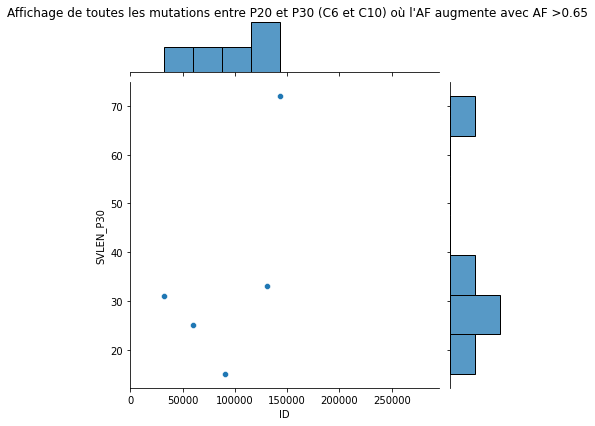

In [ ]:
mut_diff_af(0.65)

## AF = 0.3

,ID,REF,ALT,SVTYPE,SVLEN,END,AF,PASSAGE,CULTURE,DR,DV
3,22553.0,N,<DEL>,DEL,63,22616,0.495,P30,C10,52.0,51.0
106,22579.0,N,<DEL>,DEL,63,22642,0.437,P40,C10,49.0,38.0
107,29438.0,N,<DEL>,DEL,26,29464,0.467,P40,C10,48.0,42.0
4,29439.0,N,<DEL>,DEL,25,29464,0.504,P30,C10,66.0,67.0
17,49275.0,N,<DEL>,DEL,74,49349,0.791,P30,C10,24.0,91.0
115,49297.0,N,<DEL>,DEL,74,49371,0.671,P40,C10,28.0,57.0
19,53428.0,N,<DEL>,DEL,38,53466,0.719,P30,C10,36.0,92.0
116,53429.0,N,<DEL>,DEL,37,53466,0.610,P40,C10,32.0,50.0
27,83028.0,N,<DEL>,DEL,39,83067,0.448,P30,C10,74.0,60.0
121,83029.0,N,<DEL>,DEL,38,83067,0.397,P40,C10,47.0,31.0


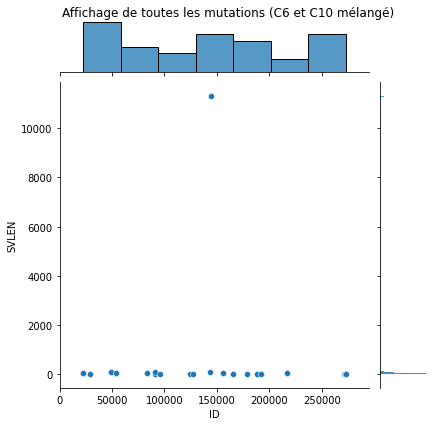

In [ ]:
mut_appear_af(0.3)

,ID,REF_P20,REF_P30,ALT_P20,ALT_P30,SVTYPE_P20,SVLEN_P30,END_P20,END_P30,AF_P20,AF_P30,PASSAGE,CULTURE,DR_P20,DR_P30,DV_P20,DV_P30
10,32535.0,N,N,AAAAAAAAAAAAAAAAAAAAAAAAAA,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA,INS,34,32535,32535,0.016,0.459,P30,C10,603.0,66.0,10.0,56.0
100,60341.0,N,N,GTATAGACCGCGTCTCTCGCCAGA,GTATAGACCCGCGTCTCTCGCCAGA,INS,25,60341,60341,0.070,0.746,P30,C10,534.0,29.0,40.0,85.0
106,76111.0,N,N,CCTCGTCTCATCCTCGACCGTACCCTCCTCATCCTCGACCGTACCC...,CCTCGTCCTCATCCTCGACCGTACCCTCCCTCATCCTCGACCGTAC...,INS,64,76111,76111,0.155,0.460,P30,C10,502.0,75.0,92.0,64.0
109,76135.0,N,N,CCCCATCCTGGACCGTACCTCTCATCCTCGACCGTACCCTCCTTAT...,TTCTCATCCTCGACCGTACCCTCCTCATCCTCGACCGTACCCTCCT...,INS,59,76135,76135,0.047,0.318,P30,C6,566.0,1027.0,28.0,478.0
110,90757.0,N,N,CGAGATGAACCTAAC,CGAGATGAACCTAAC,INS,15,90757,90757,0.176,0.667,P30,C10,421.0,42.0,90.0,84.0
112,91777.0,N,N,ATTTTGTGAT,ATTTTGCGAT,INS,10,91777,91777,0.116,0.440,P30,C10,434.0,75.0,57.0,59.0
114,131128.0,N,N,GCGGCGGCCGCTCGGCCTGGGGTTGAGAGCCGA,GGCGGTGGCTGCTCGGCCTGGGGTTGAGCTTGA,INS,33,131128,131128,0.120,0.486,P30,C10,469.0,71.0,64.0,67.0
118,143580.0,N,N,CTGTACCCTCTCAGCCGGTAACCTCTGTTGCCCTCTCAACCGGTAA...,CTGTACCTCTCCAACAGTAACCTCCGGTAACCTCTGTACCCTCCTC...,INS,72,143580,143580,0.169,0.655,P30,C10,486.0,41.0,99.0,78.0
130,177510.0,N,N,GAGAGAGAGAGA,GAGAGAGAGAGAGAGAGAGAGAGAGAGAGAGAGA,INS,34,177510,177510,0.116,0.301,P30,C10,487.0,86.0,64.0,37.0
154,187879.0,N,N,TCTTCTTCTTCTTCTTCT,TTCTTCTTCTTCTTCT,INS,15,187879,187879,0.032,0.369,P30,C10,541.0,82.0,18.0,48.0


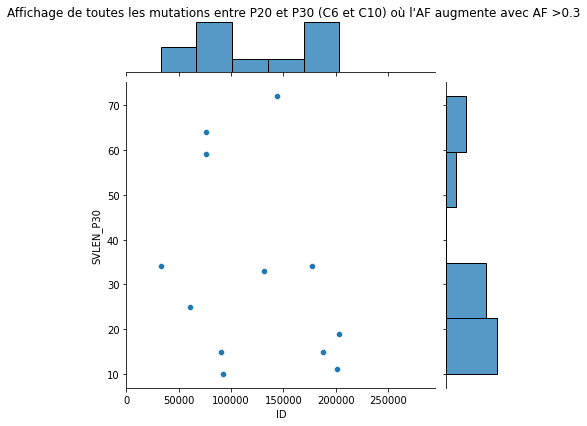

In [ ]:
mut_diff_af(0.3)

,ID,REF,ALT,SVTYPE,SVLEN,END,AF,PASSAGE,CULTURE,DR,DV
5,22545.0,N,<DEL>,DEL,63,22608,1.000,P10,C10,0.0,400.0
6,22574.0,N,<DEL>,DEL,55,22629,0.085,P10,C10,357.0,33.0
58,29448.0,N,<DEL>,DEL,25,29473,0.909,P10,C6,1.0,10.0
14,49279.0,N,<DEL>,DEL,80,49359,0.116,P10,C10,448.0,59.0
61,49312.0,N,<DEL>,DEL,76,49388,0.917,P10,C6,1.0,11.0
15,49314.0,N,<DEL>,DEL,74,49388,1.000,P10,C10,0.0,525.0
17,60342.0,N,CGCCAAGAGCG,INS,14,60342,0.262,P10,C10,336.0,119.0
18,69731.0,N,<DEL>,DEL,28,69759,1.000,P10,C10,0.0,508.0
20,75790.0,N,CCTGGAGGAGGTGGAGGAGG,INS,20,75790,0.090,P10,C10,437.0,43.0
101,75801.0,N,GGAGGTGGAGAGGAGGTGGAG,INS,20,75801,0.023,P20,C6,596.0,14.0


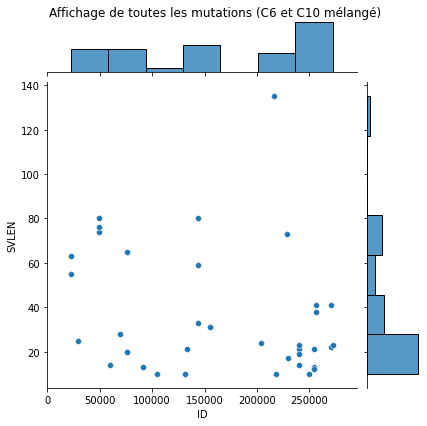

In [ ]:
mut_dissapeared()

# P1

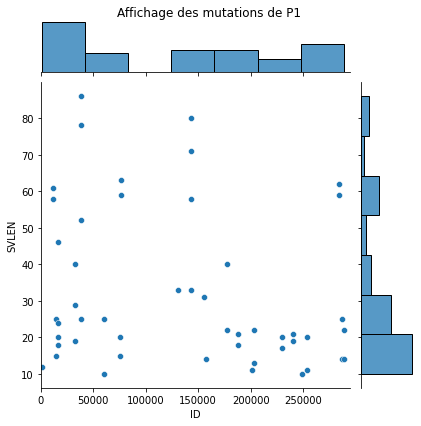

,ID,REF,ALT,SVTYPE,SVLEN,END,AF,PASSAGE,CULTURE,DR,DV
0,1137,N,<DEL>,DEL,12,1149,1.000,P1_,P50,0,29
1,11325,N,GTACATCAATTGTTTGACACATCAACTGTAAGTACATCAATTGTTT...,INS,58,11325,0.406,P1_,P50,60,41
2,11334,N,TCAACGGTTTGACACATCAACTGTAAGTACATCAATTGTTTGACAC...,INS,61,11334,0.653,P1_,P50,35,66
3,14371,N,<DEL>,DEL,25,14396,0.860,P1_,P50,22,135
4,14377,N,<DEL>,DEL,15,14392,0.127,P1_,P50,137,20
5,16050,N,TGAGTGTGTGTGTGTGTG,INS,18,16050,0.422,P1_,P50,130,95
6,16050,N,TGAGTGTGTGTGTGTGTGTG,INS,20,16050,0.262,P1_,P50,166,59
7,16050,N,TGAGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTG...,INS,46,16050,0.058,P1_,P50,212,13
8,16069,N,<DEL>,DEL,24,16093,0.076,P1_,P50,207,17
9,32535,N,AAAAAAAAAAAAAAAAAA,INS,19,32535,0.211,P1_,P50,1002,268


In [ ]:
# Comparaison P1 à la ref (variations de P1)

# Chargement des NV de P1
p1_location = "https://raw.githubusercontent.com/JulienRaynal/BILL/main/P1.csv"
# Creation du dataframe
p1_df = csv_reader([p1_location])

p = sns.jointplot(data=p1_df, x="ID", y="SVLEN", kind="scatter")
p.ax_marg_x.set_xlim(0, 295052)
p.fig.suptitle("Affichage des mutations de P1")
p.fig.subplots_adjust(top=0.95)
plt.show()


display(p1_df)